# 2. Download a ResNet 50 trained on the ImageNet classification dataset, 

b. Fine-tune the ResNet 50 model (you may choose what layers to fine-tune)
for the CIFAR-10 dataset, and evaluate the classification performance on
the test set before and after fine-tuning with respect to the following
metrics 
-  Class wise Accuracy
-  Choose any 5 classes and report Confusion Matrix.


In [ ]:
# Importing library


import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models


In [ ]:
# Downloading and Loading Data Set

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## b. Fine-tune the ResNet 50 model (you may choose what layers to fine-tune)for the CIFAR-10 dataset, and evaluate the classification performance on the test set before and after fine-tuning with respect to the following metrics 
-  Class wise Accuracy
-  Choose any 5 classes and report Confusion Matrix.

### Before Fine Tuning or From Scratch

In [ ]:
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=False)
net.fc = nn.Sequential(nn.Linear(2048, 10))
net.to(device)
#from torchsummary import summary
#summary(net,(3, 32, 32))
print()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [ ]:
# Fine-Tuning of RESNET-50

loss_RESNET = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_RESNET.append(float(running_loss / 2000))
            running_loss = 0.0
    print("Epoch %d is completed..."%(epoch+1))

Epoch 1 is completed...
Epoch 2 is completed...
Epoch 3 is completed...
Epoch 4 is completed...
Epoch 5 is completed...
Epoch 6 is completed...
Epoch 7 is completed...
Epoch 8 is completed...
Epoch 9 is completed...
Epoch 10 is completed...
Epoch 11 is completed...
Epoch 12 is completed...
Epoch 13 is completed...
Epoch 14 is completed...
Epoch 15 is completed...


In [ ]:
# Calculating Class wise Accuracy

class_lst = [0 for i in range(10)]
class_Tcount = [0 for i in range(10)]
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        p = predicted.tolist()
        l = labels.tolist()

        for i in range(len(p)):
          if (p[i]==l[i]):
            class_Tcount[p[i]]+=1
            class_lst[p[i]]+=1
          else:
            class_Tcount[l[i]]+=1
       

for i in range(10):
  temp = round((class_lst[i]/class_Tcount[i])*100,4)
  print("Accuracy of class "+ str(i) + " i.e belongs to " + classes[i] + ' is ' + str(temp) )

Accuracy of class 0 i.e belongs to plane is 73.8
Accuracy of class 1 i.e belongs to car is 79.8
Accuracy of class 2 i.e belongs to bird is 61.8
Accuracy of class 3 i.e belongs to cat is 50.0
Accuracy of class 4 i.e belongs to deer is 68.7
Accuracy of class 5 i.e belongs to dog is 61.3
Accuracy of class 6 i.e belongs to frog is 83.0
Accuracy of class 7 i.e belongs to horse is 75.2
Accuracy of class 8 i.e belongs to ship is 83.7
Accuracy of class 9 i.e belongs to truck is 82.3


In [ ]:
#Choose any 5 classes and report Confusion Matrix.
# we are choosing First five class i.e from class 0 to 4

confusion_matrix = [[0 for i in range(5)] for j in range(5)]


with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        p = predicted.tolist()
        l = labels.tolist()

        for i in range(len(p)):
          if(0<= l[i] < 5) and (0<= p[i] < 5):
            confusion_matrix[l[i]][p[i]] += 1

print('-------Confusion Matrix-------')
for i in confusion_matrix:
  for j in i:
    print(j,end='   ')
  print()


-------Confusion Matrix-------
738   28   54   16   12   
16   798   3   5   5   
48   7   618   54   101   
27   17   60   500   67   
19   5   64   61   687   


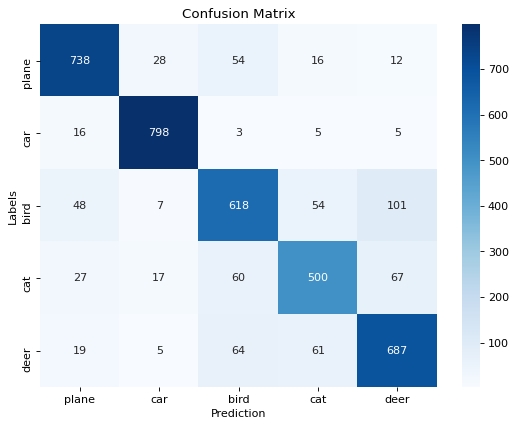

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


x_axis_labels= ['plane', 'car', 'bird', 'cat','deer']
y_axis_labels= ['plane', 'car', 'bird', 'cat','deer']


sn.heatmap(confusion_matrix, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='Blues', fmt='g')
plt.xlabel("Prediction")
plt.ylabel("Labels")
plt.title('Confusion Matrix')
plt.savefig('./Confusion_matrix_Scratch')


plt.show()


### After Fine Tuning

In [ ]:
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=True)
net.fc = nn.Sequential(nn.Linear(2048, 10))
net.to(device)
#from torchsummary import summary
#summary(net,(3, 32, 32))
print()



Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [ ]:
# Fine-Tuning of RESNET-50

loss_RESNET = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_RESNET.append(float(running_loss / 2000))
            running_loss = 0.0
    print("Epoch %d is completed..."%(epoch+1))

Epoch 1 is completed...
Epoch 2 is completed...
Epoch 3 is completed...
Epoch 4 is completed...
Epoch 5 is completed...
Epoch 6 is completed...
Epoch 7 is completed...
Epoch 8 is completed...
Epoch 9 is completed...
Epoch 10 is completed...


In [ ]:
# Calculating Class wise Accuracy

class_lst = [0 for i in range(10)]
class_Tcount = [0 for i in range(10)]
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        p = predicted.tolist()
        l = labels.tolist()

        for i in range(len(p)):
          if (p[i]==l[i]):
            class_Tcount[p[i]]+=1
            class_lst[p[i]]+=1
          else:
            class_Tcount[l[i]]+=1
       

for i in range(10):
  temp = round((class_lst[i]/class_Tcount[i])*100,4)
  print("Accuracy of class "+ str(i) + " i.e belongs to " + classes[i] + ' is ' + str(temp) )

Accuracy of class 0 i.e belongs to plane is 81.3
Accuracy of class 1 i.e belongs to car is 84.4
Accuracy of class 2 i.e belongs to bird is 73.7
Accuracy of class 3 i.e belongs to cat is 70.1
Accuracy of class 4 i.e belongs to deer is 83.4
Accuracy of class 5 i.e belongs to dog is 73.4
Accuracy of class 6 i.e belongs to frog is 83.0
Accuracy of class 7 i.e belongs to horse is 84.5
Accuracy of class 8 i.e belongs to ship is 87.9
Accuracy of class 9 i.e belongs to truck is 87.9


In [ ]:
#Choose any 5 classes and report Confusion Matrix.
# we are choosing First five class i.e from class 0 to 4

confusion_matrix = [[0 for i in range(5)] for j in range(5)]


with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        p = predicted.tolist()
        l = labels.tolist()

        for i in range(len(p)):
          if(0<= l[i] < 5) and (0<= p[i] < 5):
            confusion_matrix[l[i]][p[i]] += 1

print('-------Confusion Matrix-------')
for i in confusion_matrix:
  for j in i:
    print(j,end='   ')
  print()


-------Confusion Matrix-------
813   11   44   30   16   
12   844   4   14   3   
30   1   737   62   70   
15   4   33   701   56   
9   2   47   31   834   


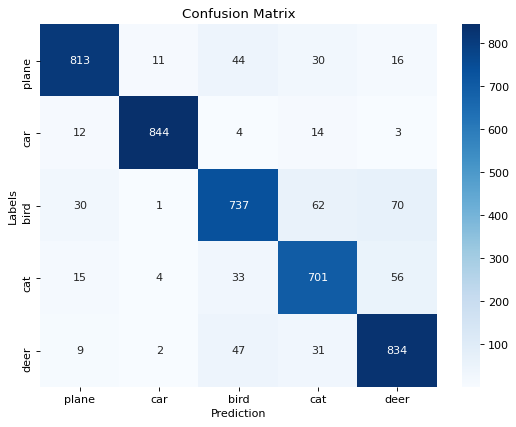

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


x_axis_labels= ['plane', 'car', 'bird', 'cat','deer']
y_axis_labels= ['plane', 'car', 'bird', 'cat','deer']


sn.heatmap(confusion_matrix, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='Blues', fmt='g')
plt.xlabel("Prediction")
plt.ylabel("Labels")
plt.title('Confusion Matrix')
plt.savefig('./Confusion_matrix')


plt.show()
